In [1]:
import numpy as np # used for linear algebra
import pandas as pd # used for processing the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')    #this function is used to mount the drive into the Google colab Notebook

Mounted at /content/drive


In [ ]:
from subprocess import check_output
print(check_output(["ls", "/content/drive/MyDrive/BigDA"]).decode("utf8")) 
#this command will give the file names that are there in the path that we have given as input to the check_output function


6100Shared
abs1.txt
ITCS6162
test.csv
train.csv



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle 
#Before the model training, we need to scramble the data to get a better training effect. You can use shuffle 
#in sklearn.utils to get the scrambled data index. Finally, iteratively generate the scrambled batch data.

%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #We can suppress all the warnings by just using the ignore action.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/BigDA/train.csv')
test = pd.read_csv('/content/drive/MyDrive/BigDA/test.csv')

In [ ]:
train.describe()
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame 
#When this method is applied to a series of string, it returns a different output which is shown in the examples below.

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [ ]:
train.head(3)

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500

[3 rows x 81 columns]

In [ ]:
print(train.head())
train.shape


   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


(1460, 81)

In [ ]:
#this code is to check if there are any duplicate rows
idsUnique = len(set(train.Id))
idsTotal = train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe,'duplicate ids')
#dropping Id colulmn because it is not an attribute or feature
train.drop(['Id'],axis =1,inplace=True)

0 duplicate ids


**Visualization**

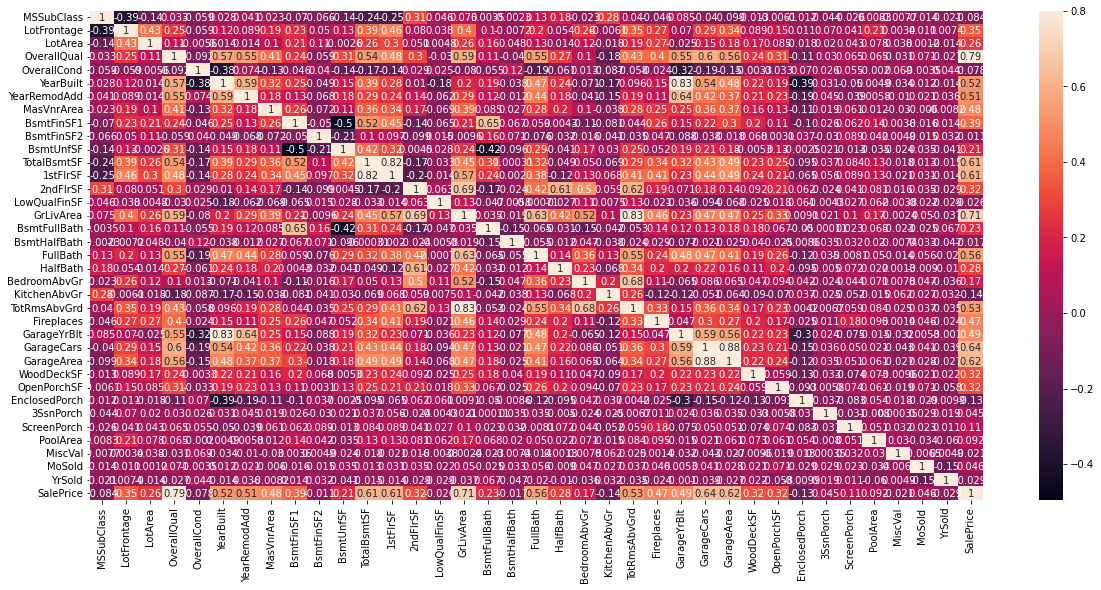

In [ ]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);
#annot is used to display corr values on heat map
#heatmap can be used to show the correlation between two variables. 
#From the ouput, what we can see is different correlations
#the stronger positive corr is shown by light color
#the stronger neg corr is shown by dark color
#and if there is no corr b/w 2 variables then the color is almost purple

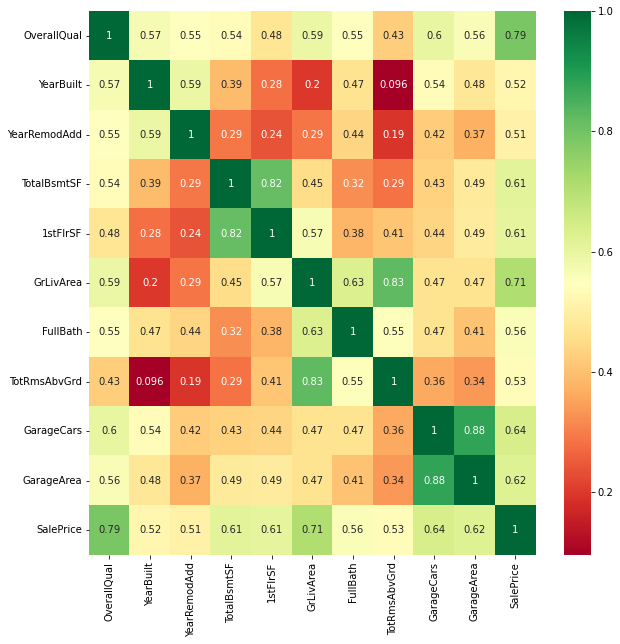

In [ ]:
# most correlated features 
#the code below gives the heatmap for which SalePrice variable is highly correlated with other attributes
#as the attribute value increase, the SalePrice value gets increased
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

most of the features are correlated with each other like Garage Cars and Garage Area, isnt it?

OverallQual is highly correlated with target feature SalePrice 0.79 can you see. we'll see how it effected the saleprice in below graph.


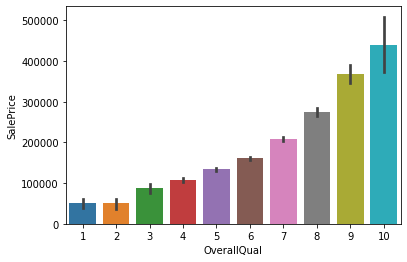

In [ ]:
sns.barplot(train.OverallQual,train.SalePrice)
#barplot indicates as the overall quality increases, the saleprice is increasing


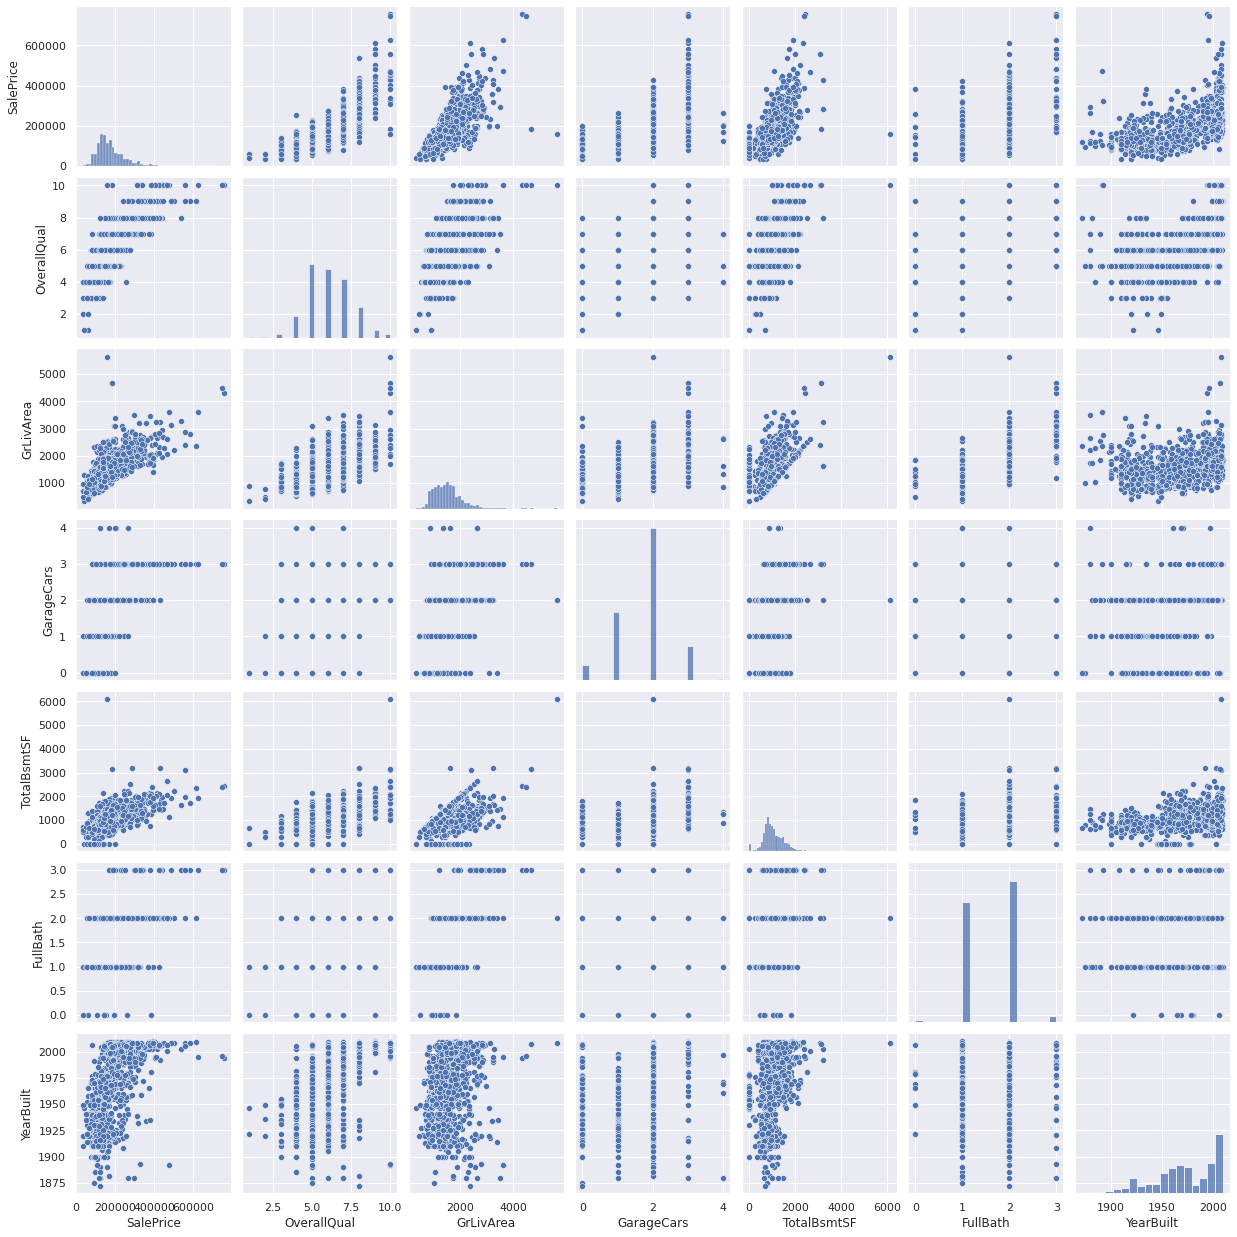

In [ ]:
sns.set() 
#Set aspects of the visual theme for all seaborn plots.
#can also customize seaborn theme or use one of six variations of the default theme. 
#Which are called deep, muted, pastel, bright, dark, and colorblind.
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

#To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function.
#This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots 
#and the diagonal plots are the univariate plots.

**SalePrice** is the variable we need to predict. So let's do some analysis on this variable first.




 mu = 180921.20 and sigma = 79415.29



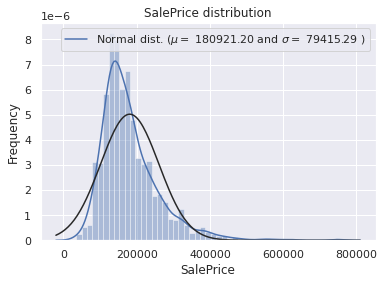

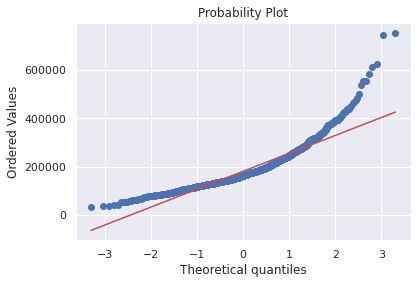

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
 #mu = 180921.20 and sigma = 79415.29



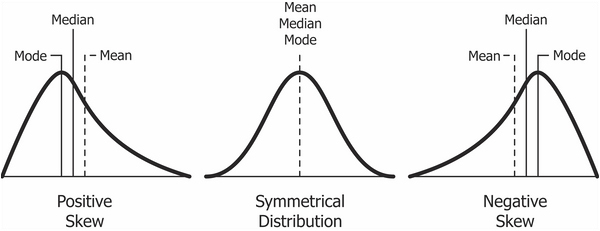

In normal distribution, the graph appears as a classical, symmetrical "bell-shaped curve." The mean, or average, and the mode, or maximum point on the curve, are equal.

In a perfect normal distribution (green solid curve in the illustration below), the tails on either side of the curve are exact mirror images of each other.















When a distribution is skewed to the left (red dashed curve), the tail on the curve's left-hand side is longer than the tail on the right-hand side, and the mean is less than the mode. This situation is also called negative skewness.






When a distribution is skewed to the right (blue dotted curve), the tail on the curve's right-hand side is longer than the tail on the left-hand side, and the mean is greater than the mode. This situation is also called positive skewness.

In [ ]:
train.SalePrice = np.log1p(train.SalePrice )
y = train.SalePrice
#This mathematical function helps user to calculate natural logarithmic value of x+1 
#where x belongs to all the input array elements. As (linear) models love normally distributed data , 
#we need to transform this variable and make it more normally distributed.
y

0       2.583824
1       2.573300
2       2.589054
3       2.553297
4       2.597433
          ...   
1455    2.570514
1456    2.584365
1457    2.602181
1458    2.554469
1459    2.557351
Name: SalePrice, Length: 1460, dtype: float64

**PRE-PROCESSING**

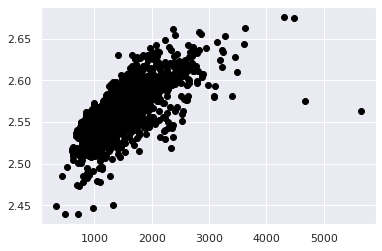

In [ ]:
plt.scatter(y =train.SalePrice,x = train.GrLivArea,c = 'black')
plt.show()
#we can see the outlier in the below image

In [ ]:
train_nas = train.isnull().sum() #is used to get number of null values in a train dataset column
train_nas = train_nas[train_nas>0] #this line gets variables in which null values are greater than zero
train_nas.sort_values(ascending=False)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [ ]:
test_nas = test.isnull().sum()
test_nas = test_nas[test_nas>0]
test_nas.sort_values(ascending = False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [ ]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)
#this you can see at the time of heatmap also.

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.815005
GrLivArea        0.697001
GarageCars       0.680156
GarageArea       0.649601
TotalBsmtSF      0.609138
FullBath         0.593950
1stFlrSF         0.593533
YearBuilt        0.587947
YearRemodAdd     0.566811
GarageYrBlt      0.542620
TotRmsAbvGrd     0.532015
Fireplaces       0.488470
MasVnrArea       0.425387
BsmtFinSF1       0.369589
LotFrontage      0.354315
WoodDeckSF       0.333100
OpenPorchSF      0.318779
2ndFlrSF         0.317684
HalfBath         0.314638
LotArea          0.255382
BsmtFullBath     0.235692
BsmtUnfSF        0.221007
BedroomAbvGr     0.211759
ScreenPorch      0.121453
PoolArea         0.068439
MoSold           0.057420
3SsnPorch        0.055326
BsmtFinSF2       0.006248
BsmtHalfBath    -0.003625
MiscVal         -0.019939
OverallCond     -0.032208
YrSold          -0.037897
LowQualFinSF    -0.038467
MSSubClass      -0.072460
KitchenAbvGr    -0.147227
EnclosedPorch   

In [ ]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [3]:
numerical_features = numerical_features.drop("SalePrice") #we are dropping saleprice bz it is the ouput value that we need to predict
print("Numerical features : " + str(len(numerical_features)))  #line prints the number of numerical features
print("Categorical features : " + str(len(categorical_features))) #line prints the no. of categorical features
train_num = train[numerical_features]
train_cat = train[categorical_features]

NameError: ignored

In [ ]:
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum())) #prints the no. of null values in num feature
train_num = train_num.fillna(train_num.median()) #this line Handle missing values for numerical features by using median as replacement
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 348
Remaining NAs for numerical features in train : 0


In [ ]:
from scipy.stats import skew  #Pandas dataframe.skew() function return unbiased skew over requested axis
skewness = train_num.apply(lambda x: skew(x)) #prints the skewness of every column
skewness.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.677636
dtype: float64

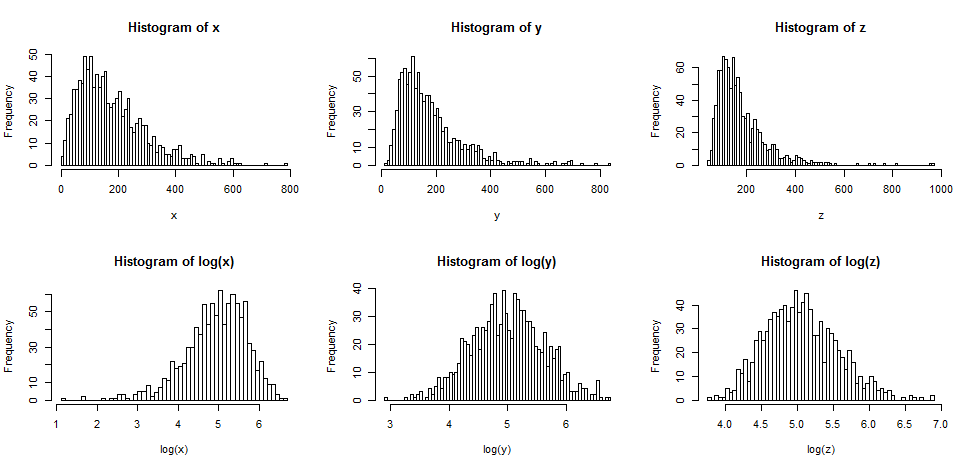

The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [ ]:
skewness = skewness[abs(skewness)>0.5]  # this line gives skewness €(-infinity,-5)U (5,infinity)
skewness.index    #we will get the features which are moderately and highly skewed               

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [ ]:
skew_features = train[skewness.index]
skew_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [ ]:
#we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
#The target variable is right skewed. As (linear) models love normally distributed data , 
#we need to transform this variable and make it more normally distributed.
skew_features = np.log1p(skew_features)

In [ ]:
# Create dummy features for categorical values via one-hot encoding
train_cat.shape 

(1460, 43)

In [ ]:
train_cat = pd.get_dummies(train_cat)
train_cat.shape

(1460, 252)

In [ ]:
train_cat.head()


MSZoning_C (all)  MSZoning_FV  ...  SaleCondition_Normal  SaleCondition_Partial
0                 0            0  ...                     1                      0
1                 0            0  ...                     1                      0
2                 0            0  ...                     1                      0
3                 0            0  ...                     0                      0
4                 0            0  ...                     1                      0

[5 rows x 252 columns]

In [ ]:
train_cat.isnull().values.sum() #to see if there are any null values present in categorical features


0

**MODELLING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

earlier we split the train set into categorical and numerical features.

Now after transformation(preprocessing) we'll join them to get the whole train set back.

In [ ]:
train = pd.concat([train_cat,train_num],axis=1)
train.shape

(1460, 288)

In [ ]:
#split the data to train AND test the model
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size = 0.3,random_state= 0)

In [ ]:
print('Input training sample shape:',X_train.shape)
print('Input testing sample shape:',X_test.shape)
print('output training sample shape:',y_train.shape)
print('output testing sample shape:',y_test.shape)

Input training sample shape: (1022, 288)
Input testing sample shape: (438, 288)
output training sample shape: (1022,)
output testing sample shape: (438,)


Defining cross_val_score function for both train and test sets separately

In [ ]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

Linear model without Regularization

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on test',rmse_CV_test(lr).mean()) 

rmse on train 91.87105499890444
rmse on test 0.019444139697433156


It might sound confusing what is validation data?

we are still working on train data only, which split was into x_train,x_test. Here x_test is the validation set we call because

we are checking how model is performing on our own data(x_test). This explanation is for beginners because they might confuse

what is the difference between test data and validation data.

You can see we plot the graph between residuals and predicated values. what is residual, you can the find the clear explanation here

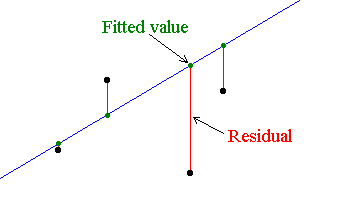

In [ ]:
#plot between predicted values and residuals
plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

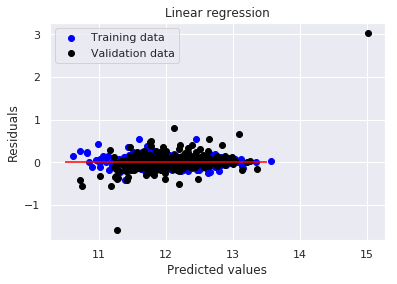

In [ ]:
# Plot predictions - Real values
plt.scatter(train_pre, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

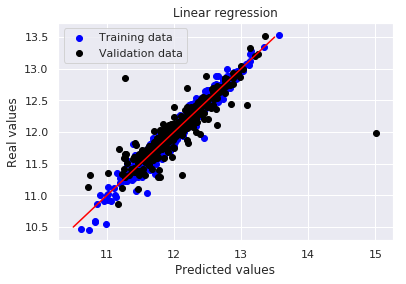